In [31]:
import torch
from torch import optim, nn
import torchvision.transforms as transform
import torchvision.datasets as dsets
import numpy as np
import torch.nn.functional as func
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [5]:
def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28,28),cmap='gray')
    plt.show()

### Basic Neural Network

In [21]:
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1= nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)
    def forward(self,x):
        x= torch.sigmoid(self.linear1(x))
        x= self.linear2(x)
        return x

In [5]:
train_data=dsets.MNIST(root='./data',download=True,train=True,transform=transform.ToTensor())
validation_data = dsets.MNIST(root='./data',download=True, transform=transform.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:12<00:00, 762550.85it/s] 


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 108819.01it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:03<00:00, 470950.26it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1142460.50it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



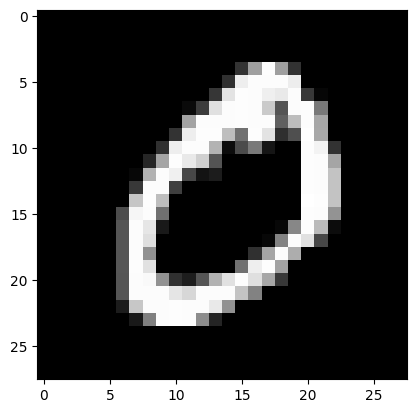

In [11]:
data_sample = train_data[1][0]
show_data(data_sample)

In [12]:
criterion = nn.CrossEntropyLoss()

In [14]:
trainloader = DataLoader(dataset=train_data, batch_size=100,shuffle=True)
validationloader = DataLoader(dataset=validation_data, batch_size= 1000, shuffle=False)

In [18]:
data_iter = iter(trainloader)
images, labels = next(data_iter)

print(f"Shape of images: {images.shape}")
print(f"Shape of labels: {labels.shape}")

Shape of images: torch.Size([100, 1, 28, 28])
Shape of labels: torch.Size([100])


In [19]:
def train(model,criterion,trainloader,validationloader,optimizer,epochs=100):
    i=0
    use = {'train loss' : [],'valid accuracy':[]}
    for epoch in range(epochs):
        for i,(x,y) in enumerate(trainloader):
            yhat = model(x.view(-1,28*28))
            loss = criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #Loss for train
            use['train loss'].append(loss.data.item())
        correct = 0
        for x,y in validationloader:
            yhat = model(x.view(-1,28*28))
            _,label = torch.max(yhat,1)
            correct += (label==y).sum().item()
            accuracy = correct/len(validation_data)
            use['valid accuracy'].append(accuracy)
    return use



In [22]:
model = Net(784,100,10)
optimizer = optim.SGD(model.parameters(), lr=1/40)
training_result = train(model,criterion,trainloader,validationloader,optimizer,epochs=100)

In [26]:
print(training_result['train loss'][-1])
print(training_result['valid accuracy'][-1])

0.05234852805733681
0.9593


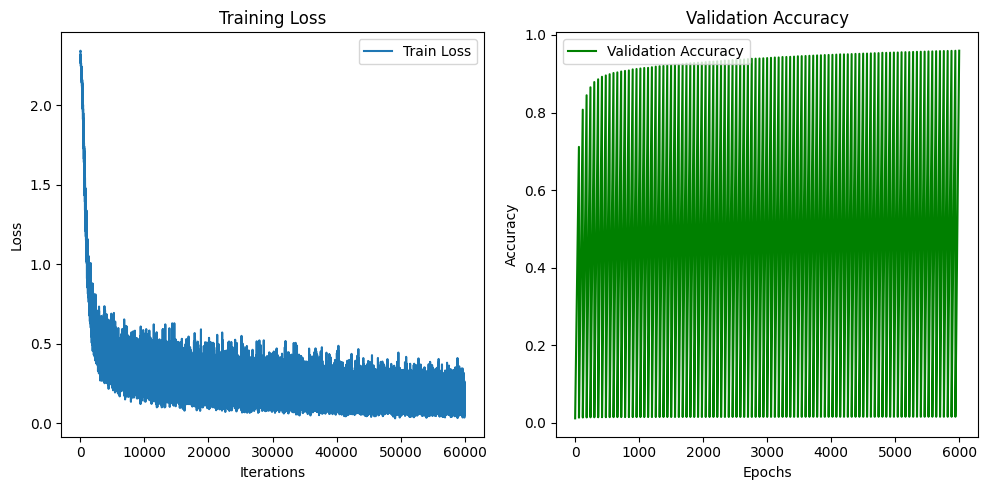

In [30]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  
plt.plot(training_result['train loss'], label='Train Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()


plt.subplot(1, 2, 2)  
plt.plot(training_result['valid accuracy'], label='Validation Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()


plt.tight_layout()
plt.show()

In [2]:
def plot_accuracy_loss(training_result): 
    plt.subplot(2, 1, 1)
    plt.plot(training_result['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_result['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()

### Deep Neural Network

In [17]:
class DeepNN(nn.Module):
    def __init__(self,D_in,H1,H2,D_out):
        super(DeepNN, self).__init__()
        self.linear1 = nn.Linear(D_in,H1)
        self.linear2 = nn.Linear(H1,H2)
        self.linear3 =nn.Linear(H2,D_out)
    def forward(self,x):
        x= torch.relu(self.linear1(x))
        x=torch.relu(self.linear2(x))
        x= self.linear3(x)
        return x

In [65]:
def train(model,criterion,trainloader,validationloader,optimizer,epochs=10):
    i=0
    use ={'training_loss':[],'val_acc':[]}
    for epoch in range(epochs):
        for i,(x,y) in enumerate(trainloader):
            z = model(x.view(-1,28*28))
            loss = criterion(z,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            use['training_loss'].append(loss.data.item())
        correct = 0
        for x,y in validationloader:
            z= model(x.view(-1,28*28))
            _,label = torch.max(z,1)
            correct += (label == y).sum().item()
        acc = correct/(len(valdata))
        use['val_acc'].append(acc)
    print(f'Epoch {epoch+1} :', use['val_acc'][epoch])

In [63]:
traindata = dsets.MNIST(root='./data',download = True, train = True, transform= transform.ToTensor())
valdata = dsets.MNIST(root='./data',download = True, transform= transform.ToTensor())

In [64]:
trainloader = DataLoader(dataset= traindata, batch_size=100, shuffle= True)
validationloader = DataLoader(dataset= valdata, batch_size= 1000, shuffle= False)

In [66]:
model = DeepNN(784,50,50,10)
optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.CrossEntropyLoss()

In [67]:
train(model,criterion,trainloader,validationloader,optimizer,epochs=10)

Epoch 9 : [0.9158833333333334, 0.9353166666666667, 0.9523, 0.96085, 0.96565, 0.97225, 0.97295, 0.9756, 0.9781666666666666, 0.9758833333333333]


In [17]:
print('Training loss: ',train_results['training_loss'][-1])
print('Validation accuracy: ',train_results['val_acc'][-1])

Training loss:  0.08146645873785019
Validation accuracy:  0.9814666666666667


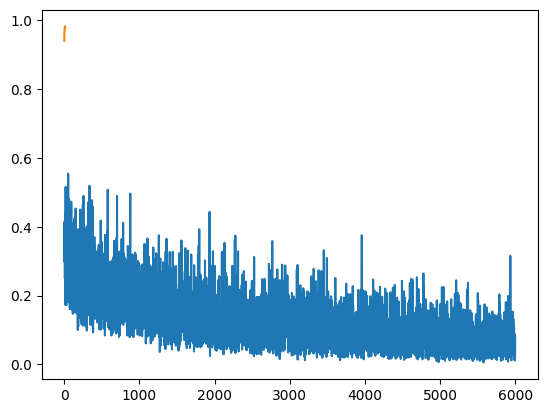

In [19]:
plt.plot(train_results['training_loss'])
plt.plot(train_results['val_acc'])
plt.show()

### nn.ModuleList()

In [12]:
Layers =[2,3,4,5]
t= zip(Layers,Layers[1:])
for i,j in t:
    print(i,j)

2 3
3 4
4 5


In [61]:
def train_list(model, criterion, trainloader, validationloader, optimizer, epochs = 10):
    i=0
    use = {'train_loss':[], 'val_acc':[]}
    for epoch in range(epochs):
        for i,(x,y) in enumerate(trainloader):
            z = model(x.view(-1,784))
            loss = criterion(z,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            use['train_loss'].append(loss.data.item())
        correct = 0
        for x,y in validationloader:
            z= model(x.view(-1,784))
            _,label = torch.max(z,1)
            correct += (label == y).sum().item()
        acc = correct/len(valdata)
        use['val_acc'].append(acc)
    return use

In [22]:
class DeepNNList(nn.Module):
    def __init__(self,layers):
        super(DeepNNList, self).__init__()
        self.hidden_layer = nn.ModuleList()
        for x,y in zip(layers,layers[1:]):
            self.hidden_layer.append(nn.Linear(x,y))
    def forward(self,x):
        for i,layer in enumerate(self.hidden_layer):
            if i< len(self.hidden_layer)-1:
                x = torch.relu(layer(x))
            else: 
                x=layer(x)
        return x

In [23]:
layers = [784,50,50,10]
model = DeepNNList(layers)
optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.CrossEntropyLoss()

In [ ]:
train_result = train_list(model, criterion, trainloader, validationloader, optimizer, epochs = 10)


In [27]:
print(train_result['train_loss'][-1])
print(train_result['val_acc'][-1])

0.12726551294326782
0.9801666666666666


### Drop out()

Simply add dropout into each layer

In [30]:
class DNN(nn.Module):
    def __init__(self, D_in,H,D_out, p =0):
        super(DNN, self).__init__()
        self.linear1 = nn.Linear(D_in,H)
        self.linear2 = nn.Linear(H,D_out)
        self.linear3 = nn.Linear(H,H)
        self.drop = nn.Dropout(p=p)
    def forward(self,x):
        x= torch.relu(self.drop(self.linear1(x)))
        x= torch.relu(self.drop(self.linear3(x)))
        x = self.linear(2)
        return x

### Initialization

- Xavier Initializer : Use for sigmoid, tanh
- He Initializer : Use for Relu

In [60]:
class DNN(nn.Module):
    def __init__(self, D_in,H,D_out, p =0):
        super(DNN, self).__init__()
        self.linear1 = nn.Linear(D_in,H)
        nn.init.xavier_uniform_(self.linear1.weight)
        # nn.init.kaiming_uniform_(self.linear1.weight)
        self.linear2 = nn.Linear(H,D_out)
        nn.init.xavier_normal_(self.linear2.weight)
        self.linear3 = nn.Linear(H,H)
        nn.init.xavier_normal_(self.linear3.weight)
        self.drop = nn.Dropout(p=p)
    def forward(self,x):
        x= torch.relu(self.drop(self.linear1(x)))
        x= torch.relu(self.drop(self.linear3(x)))
        x = self.linear(2)
        return x

### CNN

In [57]:
class CNN(nn.Module):
    def __init__(self,out1,out2):
        super(CNN,self).__init__()
        self.con1= nn.Conv2d(1,out1, kernel_size=5, stride=1)
        self.con2= nn.Conv2d(out1,out2, kernel_size=5, stride=1)
        self.pool = nn.MaxPool2d(kernel_size=2)
        # self.fc1 = nn.Linear(out2*7*7,out3) #Fully-connected layer
        self.fc2 = nn.Linear(out2*4*4, 10)
        self.out2 = out2
    def forward(self,x):
        x= torch.relu(self.con1(x))
        x = self.pool(x)
        x= torch.relu(self.con2(x))
        x= self.pool(x)
        x = x.view(x.size(0),-1)
        # x= torch.relu(self.fc1(x))
        x= self.fc2(x)
        return x

In [42]:
def train(model, criterion, trainloader, validationloader, optimizer, epochs = 10):
    i=0
    use = {'train_loss': [],'val_acc':[]}
    for epoch in range(epochs):
        model.train()
        for i,(x,y) in enumerate(trainloader):
            z=model(x)
            optimizer.zero_grad()
            loss = criterion(z,y)
            loss.backward()
            optimizer.step()
            use['train_loss'].append(loss.data.item())
        model.eval()
        correct  = 0
        for x,y in validationloader:
            z=model(x)
            _,label = torch.max(z.data,1)
            correct += (label == y).sum().item()
        acc = 100*(correct/len(valdata))
        use['val_acc'].append(acc)
        print(use['train_loss'][epoch],use['val_acc'][epoch])

In [36]:
traindata = dsets.MNIST(root='./data',train=True, download=True, transform=transform.ToTensor())
valdata = dsets.MNIST(root='./data', download=True, transform=transform.ToTensor())

In [37]:
trainloader = DataLoader(dataset=traindata, batch_size= 100, shuffle=True)
validationloader = DataLoader(dataset=valdata, batch_size=1000, shuffle=False)

In [58]:
model = CNN(32,64)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr = 1/40)

In [59]:
train(model, criterion, trainloader, validationloader, optimizer, epochs = 10)

2.3235862255096436 94.685
2.315227508544922 96.50833333333333
2.3189585208892822 97.31666666666666
2.3011085987091064 97.75
2.2985126972198486 97.88666666666667
2.3020434379577637 98.18166666666667
2.2877390384674072 98.26333333333334
2.292538642883301 98.45666666666666
2.280078172683716 98.63666666666666
2.275775671005249 98.65
